In [1]:
import pandas as pd
df=pd.read_csv("instadata.csv")

df.head()

#SVM
x=df.drop("label", axis=1)
x=x.drop("location", axis=1)
x=x.drop("gender",axis=1)
x=x.drop("id",axis=1)
y=df["label"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.4)
z=list(y_train)
ytest=list(y_test)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train,z)
output=list(svclassifier.predict(x_test))
output

accs=accuracy_score(ytest,output)
print("Accuracy score=", accs)


#Testing Unknown Data
df1=pd.read_csv("instatest.csv")

p=df1.drop("location", axis=1)
p=p.drop("gender",axis=1)
p=p.drop("id",axis=1)

output=list(svclassifier.predict(p))
predicted=list(output)

ids=list(df1["id"])
print("id       class");

for x in range(0,len(predicted)):
    print(ids[x] +"    ------>   " +predicted[x])

Accuracy score= 0.8333333333333334
id       class
srishtinene_    ------>   neutral
gautammannan    ------>   topfans
samrudhiyeginwar    ------>   neutral
shivinidixit_    ------>   topfans
poorvz_    ------>   fans
travuersa29    ------>   neutral
rahulsingh0512    ------>   neutral
shreyan_1629    ------>   neutral
bhavyaguptaa_    ------>   topfans
_atharva    ------>   topfans


In [1]:
import pandas as pd
df=pd.read_csv("instadata.csv")

df.head()


,id,count,gender,location,age,label,locationcode,gendercode
0,srushti.11,97,F,mumbai,19,topfans,1,1
1,rupaldinkar,95,F,pune,32,topfans,2,1
2,rushidate,94,M,pune,45,topfans,2,0
3,rachalian._,93,F,bengaluru,22,topfans,3,1
4,_.sonalika._,91,F,mumbai,34,topfans,1,1


In [2]:
df1 = df

In [3]:
df1['label'] = df1['label'].replace({
    "topfans": "more interested",
    "fans": "less interested"
})
df1.head()

,id,count,gender,location,age,label,locationcode,gendercode
0,srushti.11,97,F,mumbai,19,more interested,1,1
1,rupaldinkar,95,F,pune,32,more interested,2,1
2,rushidate,94,M,pune,45,more interested,2,0
3,rachalian._,93,F,bengaluru,22,more interested,3,1
4,_.sonalika._,91,F,mumbai,34,more interested,1,1


In [4]:
x=df1.drop("label", axis=1)
x=x.drop("location", axis=1)
x=x.drop("gender",axis=1)
x=x.drop("id",axis=1)
y=df1["label"]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.4)
z=list(y_train)
ytest=list(y_test)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train,z)
output=list(svclassifier.predict(x_test))
output

['less interested',
 'less interested',
 'neutral',
 'more interested',
 'more interested',
 'more interested',
 'neutral',
 'more interested',
 'neutral',
 'neutral',
 'less interested',
 'more interested']

In [7]:
accs=accuracy_score(ytest,output)
print("Accuracy score=", accs)

Accuracy score= 0.9166666666666666


In [8]:
df2=pd.read_csv("instatest.csv")

p=df2.drop("location", axis=1)
p=p.drop("gender",axis=1)
p=p.drop("id",axis=1)

output=list(svclassifier.predict(p))
predicted=list(output)
predicted

['neutral',
 'more interested',
 'neutral',
 'more interested',
 'less interested',
 'neutral',
 'neutral',
 'neutral',
 'more interested',
 'more interested']

In [9]:
ids=list(df2["id"])
print("id       class");

for x in range(0,len(predicted)):
    print(ids[x] +"    ------>   " +predicted[x])

id       class
srishtinene_    ------>   neutral
gautammannan    ------>   more interested
samrudhiyeginwar    ------>   neutral
shivinidixit_    ------>   more interested
poorvz_    ------>   less interested
travuersa29    ------>   neutral
rahulsingh0512    ------>   neutral
shreyan_1629    ------>   neutral
bhavyaguptaa_    ------>   more interested
_atharva    ------>   more interested


In [10]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


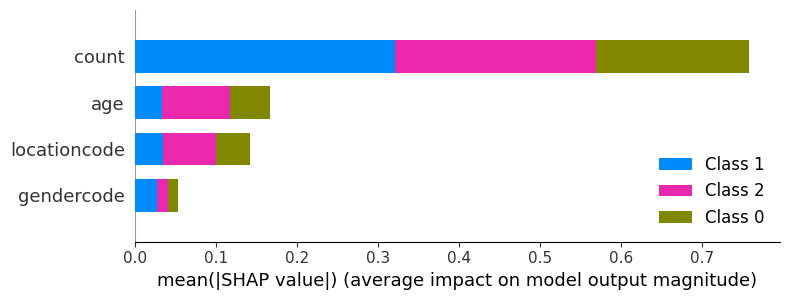

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

# Assuming df is your DataFrame
# Perform necessary data preprocessing and feature engineering here

# Split the data into features (X) and target (y)
X = df1[['count', 'gendercode', 'locationcode', 'age']]
y = df1['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Use SHAP values for interpretability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize feature importance using SHAP summary_plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [14]:
import pickle
with open('.pickle','wb') as f:
    pickle.dump(model,f)

In [13]:
model.score(X_test,y_test)

1.0